In [1]:
!pip install datasets
!pip install transformers
!pip3 install torch torchvision torchaudio
!pip install evaluate
!pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 kB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 5.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 41.7 MB/s eta 0:00

In [3]:
from datasets import list_datasets, load_dataset

# Print all the available datasets
#print(list_datasets())

# Load a dataset and print the first example in the training set
miam_dataset = load_dataset('miam', 'loria')
print(miam_dataset['train'][0])

Generating train split:   0%|          | 0/8465 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/942 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1047 [00:00<?, ? examples/s]

Dataset miam downloaded and prepared to /root/.cache/huggingface/datasets/miam/loria/1.0.0/3cb25c5337f9e60db1dc6d90344763a6ef79d7a4ac3c5f215ce6e8afe99db26c. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

{'Speaker': 'Lucas', 'Utterance': 'Alors!', 'Dialogue_Act': 'greet', 'Dialogue_ID': '0', 'File_ID': 'Dial_20110615_105040', 'Label': 5, 'Idx': 0}


In [4]:
# store dataset labels
dic_act = {}
for x in miam_dataset['train']:
  if not x['Label'] in list(dic_act):
    dic_act[x['Label'] ] = x['Dialogue_Act']
print(dic_act)

{5: 'greet', 1: 'ask', 6: 'help', 7: 'inform', 21: 'quit', 3: 'find_plans', 25: 'staff_job', 23: 'security_policies', 19: 'other', 9: 'inform_job', 30: 'yes', 8: 'inform_engine', 20: 'quality_control', 18: 'no', 4: 'first_step', 0: 'ack', 28: 'todo_failure', 13: 'informer_elcomps', 17: 'next_step', 29: 'todo_irreparable', 16: 'manufacturing_reqs', 2: 'find_mold', 10: 'inform_material_space', 27: 'studies_job', 14: 'informer_end_manufacturing', 11: 'informer_conditioner', 12: 'informer_decoration', 24: 'staff_enterprise', 22: 'reqRep', 26: 'studies_enterprise', 15: 'kindAtt'}


In [5]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased")

In [6]:
def tokenize_function(examples):
    return tokenizer(examples['Utterance'], padding="max_length", truncation=True)


tokenized_datasets = miam_dataset.map(tokenize_function, batched=True)
tokenized_datasets = tokenized_datasets.rename_column("Label", "labels")
tokenized_datasets = tokenized_datasets.rename_column("Utterance", "text")

Map:   0%|          | 0/8465 [00:00<?, ? examples/s]

Map:   0%|          | 0/942 [00:00<?, ? examples/s]

Map:   0%|          | 0/1047 [00:00<?, ? examples/s]

In [7]:
small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(1000))
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(1000))

In [8]:
from transformers import AutoModelForSequenceClassification
import torch
model = AutoModelForSequenceClassification.from_pretrained("bert-base-cased", num_labels=31)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at b

In [10]:
import numpy as np
import evaluate
import sklearn

metric = evaluate.load("accuracy")

In [11]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [12]:
from transformers import TrainingArguments, Trainer

training_args = TrainingArguments(output_dir="test_trainer", 
                                  evaluation_strategy="epoch",
                                  num_train_epochs=3,)

In [13]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)

In [14]:
trainer.train()

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy
1,No log,1.287208,0.701000
2,No log,0.992844,0.762000
3,No log,0.955981,0.761000


TrainOutput(global_step=375, training_loss=1.253308837890625, metrics={'train_runtime': 379.6442, 'train_samples_per_second': 7.902, 'train_steps_per_second': 0.988, 'total_flos': 789538692096000.0, 'train_loss': 1.253308837890625, 'epoch': 3.0})

In [15]:
def predictionPipeline(text, return_int = False):
  encoded_review = tokenizer(text, padding="max_length", truncation=True)

  input_ids = torch.tensor([encoded_review['input_ids']]).to("cuda")
  attention_mask = torch.tensor([encoded_review['attention_mask']]).to("cuda")

  output = model(input_ids, attention_mask)
  #print(output)
  _, prediction = torch.max(output["logits"], dim=1)
  if return_int:
    return prediction.tolist()[0]
  return(dic_act[prediction.tolist()[0]])

In [16]:
print(predictionPipeline("Bonjour, comment allez vous ?"))

greet


In [19]:
##### Typing error generators #####

from typing_extensions import ParamSpecKwargs
import random

def add_neighbour_error(text, frequency = 0.05, close_letter = True):
  n_error = int(len(text)*frequency)
  dic_error = {"q":["a","w"], "w":["a","e","s","q"], "e":["z","r","d","s"], "r":["e","d","f","t"],"t":["r","f","g","h","y"],"y":["t","g","h","j","u"],"i":["u","j","k","l","o"],"p":["o","l","m"],
               "a":["q","w","s","z"], "s":["a","z","e","d","x","w"],"d":["s","x","c","f","r","e"],"f":["d","r","t","g","v","c"], "g":["f","v","t","y","h","b"], "h":["g","y","u","j","n","b"], "j":["h","u","i","k","n"], "k":["l","o","i"], "l":["m","k","o"], "m":["l","p"],
               "z":["q","s","x"], "x":["z","s","c","d"], "c":["x","d","f","v"], "v":["c","f","g","b"], "b":["v","g","h","n"], "n":["b","h","j"]}
  list_alpha = list("azertyuiopqsdfghjklmwxcvbn")
  str_alpha = "azertyuiopqsdfghjklmwxcvbn"
  possible_choice = list()
  for i in range(len(text)):
    if text[i] in list(dic_error):
      possible_choice.append(i)
  
  to_change = random.sample(possible_choice, min(n_error, len(possible_choice)))

  out = ""
  for index in range(len(text)):
    if index in to_change:
      if close_letter:
        out = out + random.choice(dic_error[text[index]])
      else:
        out = out + random.choice(list(str_alpha.replace(text[index],'')))
    else:
      out = out + text[index]
  
  return out

def add_switch_error(text, frequency = 0.05, close_letter = True):
  n_error = int(len(text)*frequency)

  list_alpha = list("azertyuiopqsdfghjklmwxcvbn")
  possible_choice = list()
  for i in range(len(text)-1):
    if text[i] in list_alpha:
      possible_choice.append(i)
  
  to_change = random.sample(possible_choice, min(n_error, len(possible_choice)))

  out = ""
  index = 0
  while index < len(text):
    if index in to_change:
      out = out + text[index+1]
      out = out + text[index]
      index += 2
    else:
      out = out + text[index]
      index += 1
  
  return out

def add_missing_error(text, frequency = 0.05, close_letter = True):
  n_error = int(len(text)*frequency)

  list_alpha = list("azertyuiopqsdfghjklmwxcvbn")
  possible_choice = list()
  for i in range(len(text)-1):
    if text[i] in list_alpha:
      possible_choice.append(i)
  
  to_change = random.sample(possible_choice, min(n_error, len(possible_choice)))

  out = ""

  for index in range(len(text)):
    if index in to_change:
      pass
    else:
      out = out + text[index]
  
  return out

def add_double_error(text, frequency = 0.05, close_letter = True):
  n_error = int(len(text)*frequency)

  list_alpha = list("azertyuiopqsdfghjklmwxcvbn")
  possible_choice = list()
  for i in range(len(text)-1):
    if text[i] in list_alpha:
      possible_choice.append(i)
  
  to_change = random.sample(possible_choice, n_error)

  out = ""

  for index in range(len(text)):
    if index in to_change:
      out = out + text[index] + text[index] 
    else:
      out = out + text[index]
  
  return out

print(add_switch_error("Bonjour, je m'appelle Vincent et j'ai 45 ans.", frequency = 0.05))
print(add_neighbour_error("Bonjour, je m'appelle Vincent et j'ai 45 ans.", frequency = 0.05))
print(add_missing_error("Bonjour, je m'appelle Vincent et j'ai 45 ans.", frequency = 0.05))
print(add_double_error("Bonjour, je m'appelle Vincent et j'ai 45 ans.", frequency = 0.05))
  

Bonjuor, je m'appelle Vincetn et j'ai 45 ans.
Bohjour, je m'appelle Vincent et j'aj 45 ans.
Bonjor, j m'appelle Vincent et j'ai 45 ans.
Bonjoour, je m'appelle Vincent ett j'ai 45 ans.


In [17]:
def compare_perf_complete(dataset, error_func, frequency = 0.05, close_letter = True):
  """
  Function that computes metrics on prediction with and without typing errors on our dataset
  """
  # original dataset
  prediction = list(map(lambda x: predictionPipeline(x, return_int=True), dataset['Utterance']))

  # modified dataset
  modified_ds = list(map(lambda x: error_func(x,frequency = frequency, close_letter = close_letter), dataset['Utterance']))
  modified_prediction = list(map(lambda x: predictionPipeline(x, return_int=True), modified_ds))

  # true labels
  true_labels = dataset['Label']

  diff = np.array(prediction)-np.array(modified_prediction)
  diff[diff != 0] = 1
  print("Difference with error : ",round(diff.sum()/len(modified_ds),2))

  js = {}
  js['frequency'] = frequency
  js['len_ds'] = len(modified_ds)
  js["diff_with_tipo"] = float(diff.sum())

  index_error = np.where(diff==1)[0]
  diff_original_sentences = []
  diff_tipo_sentences = []
  for index in index_error:
    diff_original_sentences.append([dataset['Utterance'][index], dic_act[prediction[index]]])
    diff_tipo_sentences.append([modified_ds[index], dic_act[modified_prediction[index]]])

  # same classification
  js['diff_original_sentences'] = diff_original_sentences
  js['diff_tipo_sentences'] = diff_tipo_sentences


  print("__________________________________")
  print("Non modified dataset")
  diff_pred = np.array(prediction)-np.array(true_labels)
  diff_pred[diff_pred != 0] = 1
  print("Accuracy : ",round((len(modified_ds)-diff_pred.sum())/len(modified_ds),2))
  js['accuracy_non_modified'] = (len(modified_ds)-diff_pred.sum())/len(modified_ds)

  print("__________________________________")
  print("Modified dataset")
  diff_pred_mod = np.array(modified_prediction)-np.array(true_labels)
  diff_pred_mod[diff_pred_mod != 0] = 1
  print("Accuracy : ",round((len(modified_ds)-diff_pred_mod.sum())/len(modified_ds),2))
  js['accuracy_modified'] = (len(modified_ds)-diff_pred_mod.sum())/len(modified_ds)

  print("__________________________________")
  print("Data length : ", len(modified_ds))
  print("# different prediction with tipo : ", diff.sum())
  print("Same prediction with tipo : ",round((len(modified_ds)-diff.sum())*100/len(modified_ds),2),"%")

  # now false
  nb_f = (diff[diff_pred==0]==1).sum()
  js['nb_f'] = float(nb_f)
  print("__________________________________")
  print("# data which become misclassified with tipo : ", nb_f)
  print("% of total : ", round(nb_f*100/len(modified_ds),2),"%")
  print("% of different classification : ", round(nb_f*100/diff.sum(),2),"%")


  # now true
  nb_t = (diff[diff_pred_mod==0]==1).sum()
  js['nb_t'] = float(nb_t)
  print("__________________________________")
  print("# data which become well classified with tipo : ", nb_t)
  print("% of total : ", round(nb_t*100/len(modified_ds),2),"%")
  print("% of different classification : ", round(nb_t*100/diff.sum(),2),"%")

  # remain false
  nb_rf = diff.sum() - nb_t - nb_f
  js['nb_rf'] = float(nb_rf)
  print("__________________________________")
  print("# data which remains misclassified with tipo : ", nb_rf)
  print("% of total : ", round(nb_rf*100/len(modified_ds),2),"%")
  print("% of different classification : ", round(nb_rf*100/diff.sum(),2),"%")
  print("__________________________________")
  
  
  return js

  

  




In [20]:
js = compare_perf_complete(miam_dataset['train'][:1000], add_double_error, frequency = 0.05, close_letter = True)

Difference with error :  0.06
__________________________________
Non modified dataset
Accuracy :  0.74
__________________________________
Modified dataset
Accuracy :  0.74
__________________________________
Data length :  1000
# different prediction with tipo :  59
Same prediction with tipo :  94.1 %
__________________________________
# data which become misclassified with tipo :  13
% of total :  1.3 %
% of different classification :  22.03 %
__________________________________
# data which become well classified with tipo :  9
% of total :  0.9 %
% of different classification :  15.25 %
__________________________________
# data which remains misclassified with tipo :  37
% of total :  3.7 %
% of different classification :  62.71 %
__________________________________


In [18]:
import json

def save_js(js, name):
  # Serializing json
  json_object = json.dumps(js, indent=4)
  
  # Writing to sample.json
  with open(name, "w") as outfile:
      outfile.write(json_object)

def load_js(name):
  with open(name) as user_file:
    file_contents = user_file.read()

  parsed_json = json.loads(file_contents)
  return parsed_json

In [90]:
save_js(js, "double_5.json")

In [25]:
js = load_js('neighbour_5.json')

In [30]:
list(js)
list_name = ["neighbour", "missing", "double", "switch"]

res = {}
for name in list_name:
  js = load_js(name+'_5.json')
  data = [js['nb_rf'],js['nb_t'],js['nb_f']]
  res[name] = data

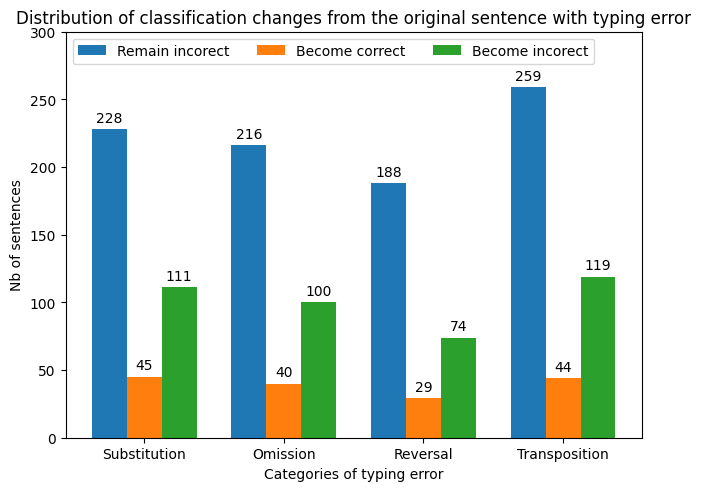

In [41]:
import matplotlib.pyplot as plt


species = ['Substitution', 'Omission', 'Reversal', 'Transposition']

data_1 = [res[name][0] for name in list(res)]
data_2 = [res[name][1] for name in list(res)]
data_3 = [res[name][2] for name in list(res)]

penguin_means = {
    'Remain incorect': data_1,
    'Become correct': data_2,
    'Become incorect': data_3,
}
x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Nb of sentences')
ax.set_xlabel('Categories of typing error')
ax.set_title('Distribution of classification changes from the original sentence with typing error')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 300)

plt.show()

In [43]:
list_frequence = [2,5,10,15]

change_nb = []
for f in list_frequence:
  js = load_js("neighbour_"+str(f)+".json")
  change_nb.append(js['diff_with_tipo']/js['len_ds'])

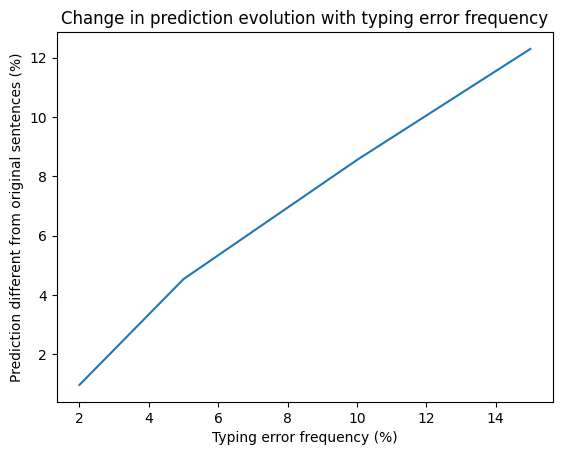

In [48]:
plt.plot([2,5,10,15], [x*100 for x in change_nb])
plt.title("Change in prediction evolution with typing error frequency")
plt.xlabel("Typing error frequency (%)")
plt.ylabel("Prediction different from original sentences (%)")
plt.show()

In [29]:
def process_list_sentence(list_original, list_modified):
  res = list()
  for i in range(len(list_original)):
    tok_or = list_original[i][0].split()
    tok_mo = list_modified[i][0].split()
    for j, m in enumerate(tok_or):
      if m != tok_mo[j]:
        res.append(m.lower())
  return res

In [40]:
js = load_js("double_5.json")

In [41]:
res = process_list_sentence(js['diff_original_sentences'], js['diff_tipo_sentences'])

In [25]:
len(res)

866

In [42]:
 from collections import Counter
 
 Counter(res).most_common()

[('manette', 22),
 ('vous', 19),
 ('je', 14),
 ('que', 14),
 ('construire', 11),
 ("c'est", 10),
 ('pour', 9),
 ('les', 7),
 ('votre', 7),
 ('de', 6),
 ('question.', 6),
 ('la', 6),
 ('est', 6),
 ('il', 6),
 ('nous', 6),
 ('manette.', 6),
 ('parti', 6),
 ('bien', 6),
 ('le', 6),
 ('peux', 5),
 ('pas', 5),
 ('non,', 5),
 ('sais', 5),
 ('des', 5),
 ('maintenant,', 5),
 ('mais', 5),
 ('merci', 5),
 ('cette', 4),
 ('mon', 4),
 ("qu'est-ce", 4),
 ('en', 4),
 ('un', 4),
 ('faut', 4),
 ('et', 4),
 ('maintenant', 4),
 ('maintenant?', 4),
 ('plans', 4),
 ('se', 4),
 ('veux', 3),
 ('moi', 3),
 ('oui,', 3),
 ('vraiment', 3),
 ('fabriquer', 3),
 ('veut', 3),
 ('chances', 3),
 ('trouve', 3),
 ('cherchez', 3),
 ('maintenance', 3),
 ('professeur', 3),
 ('bonjour,', 3),
 ("m'aider", 3),
 ('on', 3),
 ('faire', 3),
 ('pouvoir', 3),
 ('pas.', 3),
 ('matière', 3),
 ('pouvez', 3),
 ('beaucoup', 3),
 ('trouver', 3),
 ('composants', 3),
 ('avez', 3),
 ("qu'il", 3),
 ('quoi', 3),
 ('peut', 2),
 ('parlez', 2),

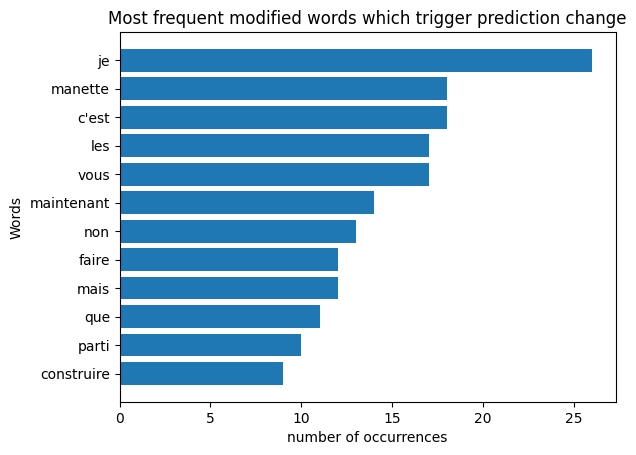

In [37]:
import matplotlib.pyplot as plt

# la liste des doublets
data = [('je', 26),
        ("c'est", 18),
        ('manette', 18),
        ('vous', 17),
        ('les', 17),
        ('maintenant', 14),
        ('non', 13),
        ('mais', 12),
        ('faire', 12),
        ('que', 11),
        ('parti', 10),
        ('construire', 9)]

# extraire les mots et leurs fréquences
data_sorted = sorted(data, key=lambda x: x[1], reverse=False)
words = [d[0] for d in data_sorted]
frequencies = [d[1] for d in data_sorted]

# tracer l'histogramme horizontal
plt.barh(words, frequencies)
plt.xlabel('number of occurrences')
plt.ylabel('Words')
plt.title('Most frequent modified words which trigger prediction change')
plt.show()

In [80]:
from tqdm import tqdm

def frequecy_distribution_computer(list_text, func_error):
  res = []
  frequency_list = [0.02, 0.04, 0.06, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.25, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
  frequency_list = [0.02*i for i in range(1,50)]
  for text in tqdm(list_text):
    non_modified_pred = predictionPipeline(text, return_int = True)
    find = False
    for f in frequency_list:
      mod_text = func_error(text, f, True)
      mod_pred = predictionPipeline(mod_text, return_int = True)
      if mod_pred != non_modified_pred:
        find = True
        res.append(f)
        break
  return res



In [84]:
list_freq = frequecy_distribution_computer(miam_dataset['train'][:1000]['Utterance'], add_neighbour_error)

100%|██████████| 1000/1000 [10:11<00:00,  1.64it/s]


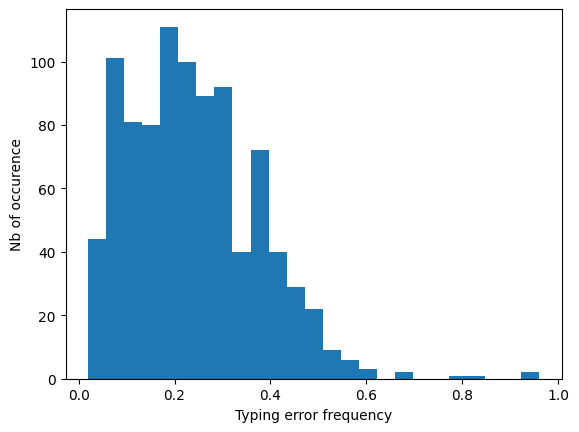

In [92]:
plt.hist(list_freq, bins=25)
plt.ylabel("Nb of occurence")
plt.xlabel("Typing error frequency")

plt.show()

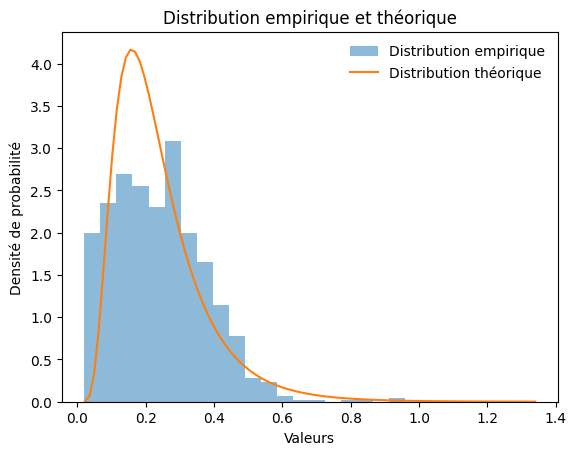

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm

# La distribution
dist = list_freq

# Calculer les paramètres de la loi log-normale
mean = np.mean(dist)
std = np.std(dist)
sigma = np.sqrt(np.log(1 + (std/mean)**2))
mu = np.log(mean) - 0.5 * sigma ** 2

# Créer un échantillon de la loi log-normale
s = np.random.lognormal(mu, sigma, 10000)

# Créer une plage de valeurs pour tracer la courbe de densité de probabilité
x = np.linspace(min(s), max(s), 100)

# Calculer la fonction de densité de probabilité de la loi log-normale
pdf = lognorm.pdf(x, sigma, scale=np.exp(mu))

# Tracer la distribution empirique et théorique sur un graphe
fig, ax = plt.subplots(1, 1)
ax.hist(dist, bins=20, density=True, alpha=0.5, label='Distribution empirique')
ax.plot(x, pdf, label='Distribution théorique')
ax.legend(loc='best', frameon=False)
ax.set_xlabel('Valeurs')
ax.set_ylabel('Densité de probabilité')
ax.set_title('Distribution empirique et théorique')
plt.show()


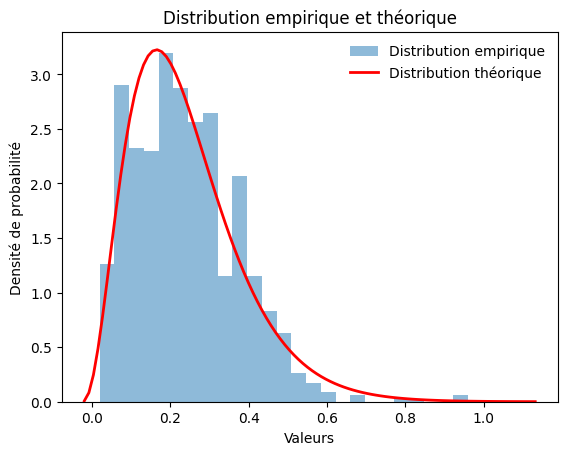

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma

# La distribution
dist = list_freq

# Calculer les paramètres de la loi gamma
shape, loc, scale = gamma.fit(dist)

# Créer un échantillon de la loi gamma
s = np.random.gamma(shape, scale, 10000) + loc

# Créer une plage de valeurs pour tracer la courbe de densité de probabilité
x = np.linspace(min(s), max(s), 100)

# Calculer la densité de probabilité de la loi gamma
pdf = gamma.pdf(x, shape, loc=loc, scale=scale)

# Tracer la distribution empirique et théorique sur un graphe
fig, ax = plt.subplots(1, 1)
ax.hist(dist, bins=25, density=True, alpha=0.5, label='Distribution empirique')
ax.plot(x, pdf, 'r-', lw=2, label='Distribution théorique')
ax.legend(loc='best', frameon=False)
ax.set_xlabel('Valeurs')
ax.set_ylabel('Densité de probabilité')
ax.set_title('Distribution empirique et théorique')
plt.show()


In [102]:
import numpy as np
from scipy.stats import gamma, kstest

# La distribution
dist = list_freq

# Calculer les paramètres de la loi gamma
shape, loc, scale = gamma.fit(dist)

# Créer un échantillon de la loi gamma
s = np.random.gamma(shape, scale, 10000) + loc

# Effectuer un test de Kolmogorov-Smirnov pour comparer la distribution empirique à la distribution théorique
D, p_value = kstest(dist, 'gamma', args=(shape, loc, scale))

# Imprimer la statistique D et la valeur p
print("Statistique D :", D)
print("Valeur p :", p_value)

Statistique D : 0.0699763954882967
Valeur p : 0.00022037960750054622
